# Hyperparameters lab

## Introduction

In this lesson, we'll use the California Housing dataset to train a decision tree and tune our hyperparameters.

## Working with the california housing dataset

Let's get started by loading up our data and splitting it.

In [22]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
dataset = fetch_california_housing()



X = pd.DataFrame(X, columns = dataset['feature_names'])
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=42)

We split our data into training and test data.  Let's take a look at the first few rows of our data.

In [24]:
X[:3]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [25]:
X.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [29]:
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

## Training our decision tree

Because all of our data is numeric, and we do not have any na values, we should be able to train our decision tree.

In [33]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

First check the score on the training set.

In [37]:
model.score(X_train, y_train)

# 0.9999999999999576

0.9999999999999576

But what really matters is how well we perform on the test set.

In [34]:
model.score(X_test, y_test)

0.6218026389952888

So we don't do as well on the test set, but we still don't perform too poorly.

### Setting parameters in SKLearn

Let's see if we can improve our model by tuning our hyperparameters.  We can do so by trying different `max_depth` between 1 and 50, and assessing the score.

In [40]:
models = [DecisionTreeRegressor(max_depth = idx).fit(X_train, y_train) for idx in range(1, 50)]

In [41]:
scores = [model.score(X_test, y_test) for model in models]

So fitting our decision tree with this hyperparameter we find the following.

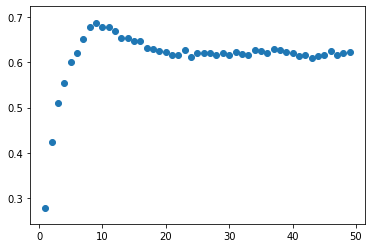

In [43]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
max_levs = list(range(1, 50))
ax.scatter(max_levs, scores)

So we can see that our model performs best when we have max levels of 11.  Let's train and score the model again, with a hyperparameter of 11.

In [46]:
model = DecisionTreeRegressor(max_depth = 11)
model.fit(X_train, y_train).score(X_test,y_test)

0.6808146299786579

So we can see that we slightly improve our score score by tuning our `max_depth` hyperparameter.

### Summary

In this lesson, we practiced tuning the hyperparameter in a single decision tree.  We did so by looping through different values for our hyperparameter and then choosing the hyperparameter that results in the highest score on our holdout set.  In future lessons, we'll be using this same technique to choose our hyperparameters as we move to random forests.